# Simple Data cleaning

In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
from scipy import stats
import math
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("dataCancer.csv")
print(df.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [3]:
print(df.columns)
print(df.index)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')
RangeIndex(start=0, stop=569, step=1)


In [4]:
print(df.values)

[[842302 'M' 17.99 ... 0.4601 0.1189 nan]
 [842517 'M' 20.57 ... 0.275 0.08902 nan]
 [84300903 'M' 19.69 ... 0.3613 0.08758 nan]
 ...
 [926954 'M' 16.6 ... 0.2218 0.0782 nan]
 [927241 'M' 20.6 ... 0.4087 0.124 nan]
 [92751 'B' 7.76 ... 0.2871 0.07039 nan]]


In [5]:
df.sort_values('smoothness_mean', ascending=False,)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
504,915186,B,9.268,12.87,61.49,248.7,0.16340,0.22390,0.097300,0.052520,...,16.38,69.05,300.2,0.19020,0.34410,0.209900,0.102500,0.3038,0.12520,NaN
122,865423,M,24.250,20.20,166.20,1761.0,0.14470,0.28670,0.426800,0.201200,...,23.99,180.90,2073.0,0.16960,0.42440,0.580300,0.224800,0.3222,0.08009,NaN
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,...,26.50,98.87,567.7,0.20980,0.86630,0.686900,0.257500,0.6638,0.17300,NaN
105,863030,M,13.110,15.56,87.21,530.2,0.13980,0.17650,0.207100,0.096010,...,22.40,106.40,827.2,0.18620,0.40990,0.637600,0.198600,0.3147,0.14050,NaN
520,917092,B,9.295,13.90,59.96,257.8,0.13710,0.12250,0.033320,0.024210,...,17.84,67.84,326.6,0.18500,0.20970,0.099960,0.072620,0.3681,0.08982,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,9111596,B,11.870,21.54,76.83,432.0,0.06613,0.10640,0.087770,0.023860,...,28.18,83.51,507.2,0.09457,0.33990,0.321800,0.087500,0.2305,0.09952,NaN
298,892214,B,14.260,18.17,91.22,633.1,0.06576,0.05220,0.024750,0.013740,...,25.26,105.80,819.7,0.09445,0.21670,0.156500,0.075300,0.2636,0.07676,NaN
270,8910721,B,14.290,16.82,90.30,632.6,0.06429,0.02675,0.007250,0.006250,...,20.65,94.44,684.6,0.08567,0.05036,0.038660,0.033330,0.2458,0.06120,NaN
178,873357,B,13.010,22.22,82.01,526.4,0.06251,0.01938,0.001595,0.001852,...,29.02,88.18,608.8,0.08125,0.03432,0.007977,0.009259,0.2295,0.05843,NaN


In [6]:
new_df = df[['diagnosis', 'texture_mean','radius_mean','perimeter_mean' ,'smoothness_mean', 'concavity_mean', ]]
new_df

,diagnosis,texture_mean,radius_mean,perimeter_mean,smoothness_mean,concavity_mean
0,M,10.38,17.99,122.80,0.11840,0.30010
1,M,17.77,20.57,132.90,0.08474,0.08690
2,M,21.25,19.69,130.00,0.10960,0.19740
3,M,20.38,11.42,77.58,0.14250,0.24140
4,M,14.34,20.29,135.10,0.10030,0.19800
...,...,...,...,...,...,...
564,M,22.39,21.56,142.00,0.11100,0.24390
565,M,28.25,20.13,131.20,0.09780,0.14400
566,M,28.08,16.60,108.30,0.08455,0.09251
567,M,29.33,20.60,140.10,0.11780,0.35140


In [7]:
#we can create and add a new column
new_df['radius_to_perimeter'] = new_df['radius_mean']/new_df['perimeter_mean']
new_df

/var/folders/dw/93tk385j54q9dmq3f082vbnm0000gn/T/ipykernel_10312/2639583629.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['radius_to_perimeter'] = new_df['radius_mean']/new_df['perimeter_mean']


,diagnosis,texture_mean,radius_mean,perimeter_mean,smoothness_mean,concavity_mean,radius_to_perimeter
0,M,10.38,17.99,122.80,0.11840,0.30010,0.146498
1,M,17.77,20.57,132.90,0.08474,0.08690,0.154778
2,M,21.25,19.69,130.00,0.10960,0.19740,0.151462
3,M,20.38,11.42,77.58,0.14250,0.24140,0.147203
4,M,14.34,20.29,135.10,0.10030,0.19800,0.150185
...,...,...,...,...,...,...,...
564,M,22.39,21.56,142.00,0.11100,0.24390,0.151831
565,M,28.25,20.13,131.20,0.09780,0.14400,0.153430
566,M,28.08,16.60,108.30,0.08455,0.09251,0.153278
567,M,29.33,20.60,140.10,0.11780,0.35140,0.147038


In [ ]:
#Finding a 50th percentile
def pct_50(column):
    return column.quantile(0.5)

print(new_df[['radius_mean', 'perimeter_mean']].agg(pct_50))

#cumulative sum, cummax,cummin,cumprod 

radius_mean       13.37
perimeter_mean    86.24
dtype: float64


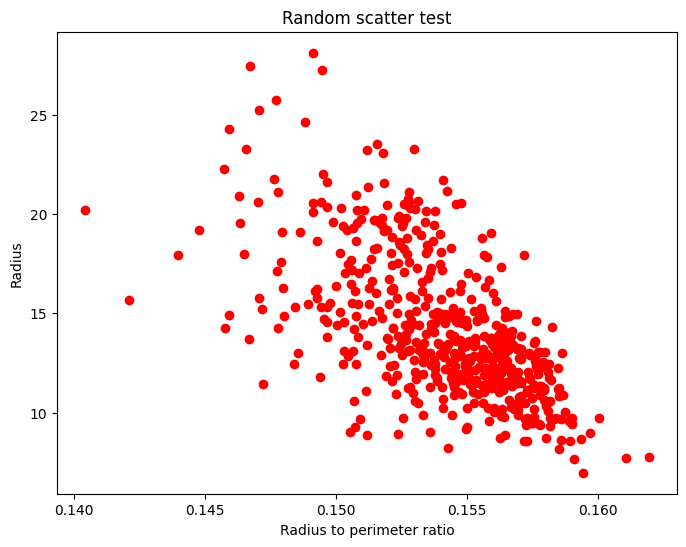

In [8]:
plt.figure(figsize=(8,6))
plt.scatter(new_df['radius_to_perimeter'],new_df['radius_mean'], color='red')
plt.title('Random scatter test')
plt.xlabel("Radius to perimeter ratio")
plt.ylabel("Radius")
plt.show()

In [9]:
#Filter data
new_df[new_df['diagnosis'] == 'M']

,diagnosis,texture_mean,radius_mean,perimeter_mean,smoothness_mean,concavity_mean,radius_to_perimeter
0,M,10.38,17.99,122.80,0.11840,0.30010,0.146498
1,M,17.77,20.57,132.90,0.08474,0.08690,0.154778
2,M,21.25,19.69,130.00,0.10960,0.19740,0.151462
3,M,20.38,11.42,77.58,0.14250,0.24140,0.147203
4,M,14.34,20.29,135.10,0.10030,0.19800,0.150185
...,...,...,...,...,...,...,...
563,M,25.09,20.92,143.00,0.10990,0.31740,0.146294
564,M,22.39,21.56,142.00,0.11100,0.24390,0.151831
565,M,28.25,20.13,131.20,0.09780,0.14400,0.153430
566,M,28.08,16.60,108.30,0.08455,0.09251,0.153278


In [22]:
print(new_df['radius_mean'].min())
print(new_df['radius_mean'].max())

6.981
28.11


In [10]:
malignantD = df[df['diagnosis'] == 'M']
malignant_radius = malignantD['radius_mean']

print(malignant_radius)

0      17.99
1      20.57
2      19.69
3      11.42
4      20.29
       ...  
563    20.92
564    21.56
565    20.13
566    16.60
567    20.60
Name: radius_mean, Length: 212, dtype: float64


In [11]:
malignant_radius.sort_values(ascending=True)

41     10.95
379    11.08
3      11.42
297    11.76
146    11.80
       ...  
82     25.22
352    25.73
180    27.22
461    27.42
212    28.11
Name: radius_mean, Length: 212, dtype: float64

In [12]:
malignant_radius > 20

0      False
1       True
2      False
3      False
4       True
       ...  
563     True
564     True
565     True
566    False
567     True
Name: radius_mean, Length: 212, dtype: bool

In [16]:
#Sample statistics
mean_malignant_radius = np.mean(malignant_radius)
sd_malignant_radius = np.std(malignant_radius)
print(mean_malignant_radius)
print(sd_malignant_radius)

17.462830188679245
3.196405633076646


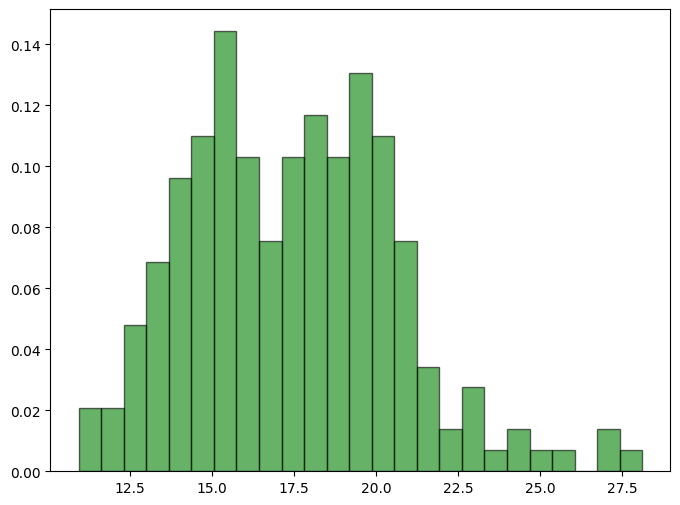

In [61]:
plt.figure(figsize=(8,6))
plt.hist(malignant_radius, bins=25, density=True, alpha=0.6, color='green', edgecolor='k')
plt.show()

In [54]:
x_max = np.max(malignant_radius)
x_min = np.min(malignant_radius)

print(x_min)
print(x_max)

10.95
28.11
